#### tensorflow 测试

首先测试环境

In [3]:
import tensorflow as tf
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(hello))

b'Hello, TensorFlow!'


通过 tensorflow 实现 mnist 手写数字数据集合的识别

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

--- 暂时不知道用处

In [11]:
learn = tf.contrib.learn
tf.logging.set_verbosity(tf.logging.ERROR)

下载 mnist 数据集

In [12]:
mnist = learn.datasets.load_dataset('mnist')
data = mnist.train.images
labels = np.asarray(mnist.train.labels, dtype=np.int32)
test_data = mnist.test.images
test_labels = np.asarray(mnist.test.labels, dtype=np.int32)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST-data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz


In [13]:
max_examples = 10000
data = data[:max_examples]
labels = labels[:max_examples]

In [14]:
def display(i):
    img = test_data[i]
    plt.title('Example %d. Label: %d' % (i, test_labels[i]))
    plt.imshow(img.reshape((28, 28)), cmap=plt.cm.gray_r)
    plt.show()

显示函数

In [16]:
def test_display():
    display(0)
    display(1)
    display(8)
    print( len(data[0]))

In [17]:
feature_columns = learn.infer_real_valued_columns_from_input(data)
classifier = learn.LinearClassifier(feature_columns=feature_columns, n_classes=10)
classifier.fit(data, labels, batch_size=100, steps=1000)
result = classifier.evaluate(test_data, test_labels)
print (result["accuracy"])

/root/p35test/local/lib/python3.5/site-packages/tensorflow/python/util/deprecation.py:247: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


0.9137


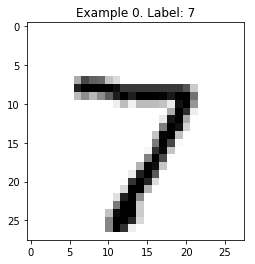

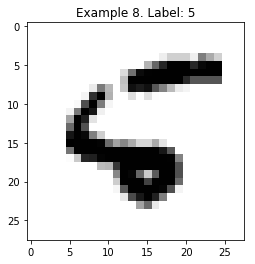

In [21]:
# here's one it gets right
# print ("Predicted %d, Label: %d" % (classifier.predict(test_data[0]), test_labels[0]))
display(0)
# and one it gets wrong
# print ("Predicted %d, Label: %d" % (classifier.predict(test_data[8]), test_labels[8]))
display(8)

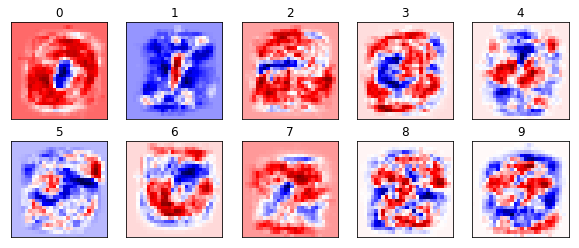

In [19]:
weights = classifier.weights_
f, axes = plt.subplots(2, 5, figsize=(10, 4))
axes = axes.reshape(-1)
for i in range(len(axes)):
    a = axes[i]
    a.imshow(weights.T[i].reshape(28, 28), cmap=plt.cm.seismic)
    a.set_title(i)
    a.set_xticks(())  # ticks be gone
    a.set_yticks(())
plt.show()